In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# import data from the github page of the book
data = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter02/data/Absenteeism_at_work.csv', sep=";")

In [0]:
# print dimensionality of the data, columns, types and missing values
print(f"Data dimension: {data.shape}")
for col in data.columns:
    print(f"Column: {col:35} | type: {str(data[col].dtype):7} | missing values: {data[col].isna().sum():3d}")

Data dimension: (740, 21)
Column: ID                                  | type: int64   | missing values:   0
Column: Reason for absence                  | type: int64   | missing values:   0
Column: Month of absence                    | type: int64   | missing values:   0
Column: Day of the week                     | type: int64   | missing values:   0
Column: Seasons                             | type: int64   | missing values:   0
Column: Transportation expense              | type: int64   | missing values:   0
Column: Distance from Residence to Work     | type: int64   | missing values:   0
Column: Service time                        | type: int64   | missing values:   0
Column: Age                                 | type: int64   | missing values:   0
Column: Work load Average/day               | type: float64 | missing values:   0
Column: Hit target                          | type: int64   | missing values:   0
Column: Disciplinary failure                | type: int64   | missing va

In [0]:
# compute statistics on numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [0]:
# define encoding dictionaries
month_encoding = {1: "January", 2: "February", 3: "March", 4: "April", 
    5: "May", 6: "June", 7: "July", 8: "August", 
    9: "September", 10: "October", 11: "November", 12: "December", 0: "Unknown"}
dow_encoding = {2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday", 6: "Friday"}
season_encoding = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
education_encoding = {1: "high_school", 2: "graduate", 3: "postgraduate", 4: "master_phd"}
yes_no_encoding = {0: "No", 1: "Yes"}

# backtransform numerical variables to categorical
preprocessed_data = data.copy()
preprocessed_data["Month of absence"] = preprocessed_data["Month of absence"]\
    .apply(lambda x: month_encoding[x]) 
preprocessed_data["Day of the week"] = preprocessed_data["Day of the week"]\
    .apply(lambda x: dow_encoding[x]) 
preprocessed_data["Seasons"] = preprocessed_data["Seasons"]\
    .apply(lambda x: season_encoding[x]) 
preprocessed_data["Education"] = preprocessed_data["Education"]\
    .apply(lambda x: education_encoding[x]) 
preprocessed_data["Disciplinary failure"] = preprocessed_data["Disciplinary failure"]\
    .apply(lambda x: yes_no_encoding[x]) 
preprocessed_data["Social drinker"] = preprocessed_data["Social drinker"]\
    .apply(lambda x: yes_no_encoding[x]) 
preprocessed_data["Social smoker"] = preprocessed_data["Social smoker"]\
    .apply(lambda x: yes_no_encoding[x]) 

In [0]:
# transform columns
preprocessed_data.head().T

,0,1,2,3,4
ID,11,36,3,7,11
Reason for absence,26,0,23,7,23
Month of absence,July,July,July,July,July
Day of the week,Tuesday,Tuesday,Wednesday,Thursday,Thursday
Seasons,Spring,Spring,Spring,Spring,Spring
Transportation expense,289,118,179,279,289
Distance from Residence to Work,36,13,51,5,36
Service time,13,18,18,14,13
Age,33,50,38,39,33
Work load Average/day,239.554,239.554,239.554,239.554,239.554


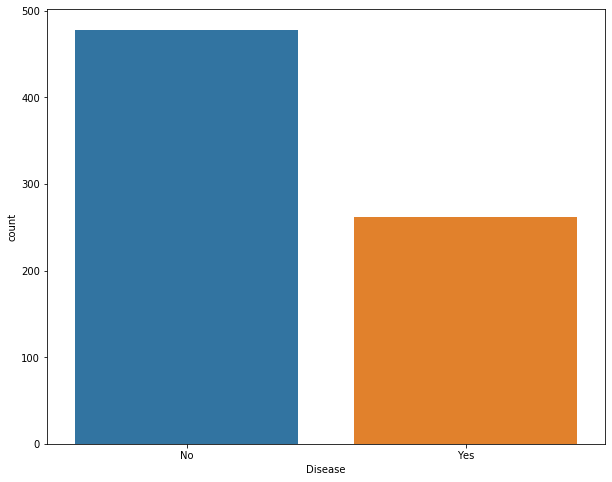

In [0]:
# define function, which checks if the provided integer value 
# is contained in the ICD or not
def in_icd(val):
    return "Yes" if val >= 1 and val <= 21 else "No"

# add Disease column
preprocessed_data["Disease"] = preprocessed_data["Reason for absence"]\
    .apply(in_icd)

# plot value counts
plt.figure(figsize=(10, 8))
sns.countplot(data=preprocessed_data, x='Disease')
plt.savefig('figs/disease_plot.png', format='png', dpi=300)

# Initial analysis on the reason for absence

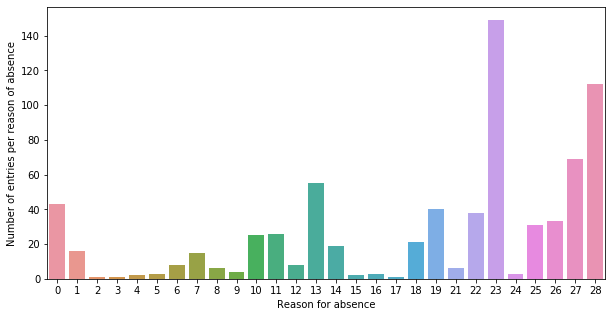

In [0]:
# get the number of entries for each reason for absence
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=preprocessed_data, x="Reason for absence")
ax.set_ylabel("Number of entries per reason of absence")
plt.savefig('figs/absence_reasons_distribution.png', format='png', dpi=300)

#### Social drinkers and smokers analysis

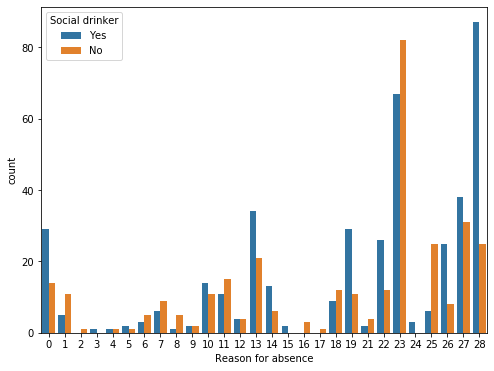

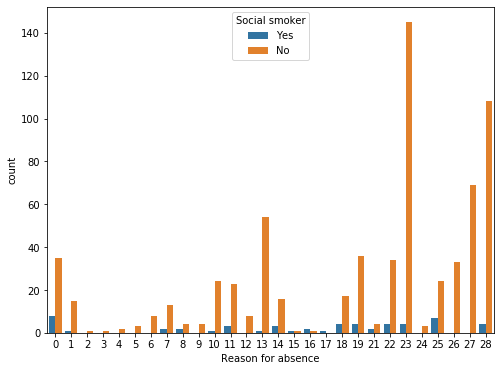

In [0]:
# plot reasons for absence against being a social drinker/smoker
plt.figure(figsize=(8, 6))
sns.countplot(data=preprocessed_data, x="Reason for absence", 
              hue="Social drinker", hue_order=["Yes", "No"])
plt.savefig('figs/absence_reasons_drinkers.png', format='png', dpi=300)

plt.figure(figsize=(8, 6))
sns.countplot(data=preprocessed_data, x="Reason for absence", 
              hue="Social smoker", hue_order=["Yes", "No"])
plt.savefig('figs/absence_reasons_smokers.png', format='png', dpi=300)

In [0]:
print(preprocessed_data["Social drinker"].value_counts(normalize=True))
print(preprocessed_data["Social smoker"].value_counts(normalize=True))

Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64
No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64


In [0]:
# computation of conditional probability
sample_space = set(["BB", "BG", "GB", "GG"])
event_a = set(["BB"])
event_b = set(["BB", "BG", "GB"])

cond_prob = (0.25*len(event_a.intersection(event_b))) / (0.25*len(event_b))
print(round(cond_prob, 4))

0.3333


P(social drinker) = 0.568 | P(social smoker) = 0.073


<Figure size 432x288 with 0 Axes>

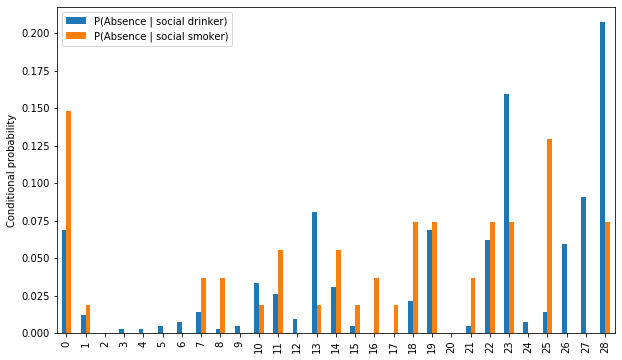

In [0]:
# compute probabilities of being a drinker and smoker
drinker_prob = preprocessed_data["Social drinker"]\
    .value_counts(normalize=True)["Yes"]
smoker_prob = preprocessed_data["Social smoker"]\
    .value_counts(normalize=True)["Yes"]
print(f"P(social drinker) = {drinker_prob:.3f} | P(social smoker) = {smoker_prob:.3f}")

# create mask for social drinkers/smokers
drinker_mask = preprocessed_data["Social drinker"] == "Yes"
smoker_mask = preprocessed_data["Social smoker"] == "Yes"

# compute probabilities of absence reasons and being a social drinker/smoker
total_entries = preprocessed_data.shape[0]
absence_drinker_prob = preprocessed_data["Reason for absence"]\
    [drinker_mask].value_counts()/total_entries
absence_smoker_prob = preprocessed_data["Reason for absence"]\
    [smoker_mask].value_counts()/total_entries

# compute conditional probabilities
cond_prob = pd.DataFrame(index=range(0,29))
cond_prob["P(Absence | social drinker)"] = absence_drinker_prob/drinker_prob
cond_prob["P(Absence | social smoker)"] = absence_smoker_prob/smoker_prob

# plot probabilities
plt.figure()
ax = cond_prob.plot.bar(figsize=(10,6))
ax.set_ylabel("Conditional probability")
plt.savefig('figs/conditional_probabilities.png', format='png', dpi=300)

In [0]:
# compute reason for absence probabilities
absence_prob = preprocessed_data["Reason for absence"].value_counts(normalize=True)

<Figure size 432x288 with 0 Axes>

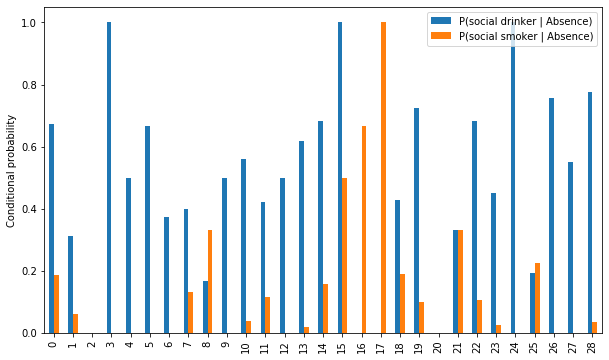

In [0]:
# compute conditional probabilities for drinker/smoker
cond_prob_drinker_smoker = pd.DataFrame(index=range(0,29))
cond_prob_drinker_smoker["P(social drinker | Absence)"] = \
    cond_prob["P(Absence | social drinker)"]*drinker_prob/absence_prob
cond_prob_drinker_smoker["P(social smoker | Absence)"] = \
    cond_prob["P(Absence | social smoker)"]*smoker_prob/absence_prob

plt.figure()
ax = cond_prob_drinker_smoker.plot.bar(figsize=(10,6))
ax.set_ylabel("Conditional probability")
plt.savefig('figs/conditional_probabilities_drinker_smoker.png', format='png', dpi=300)

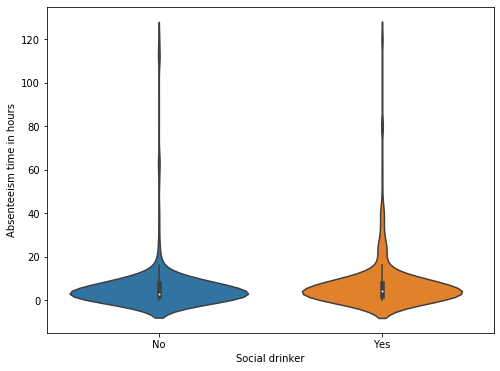

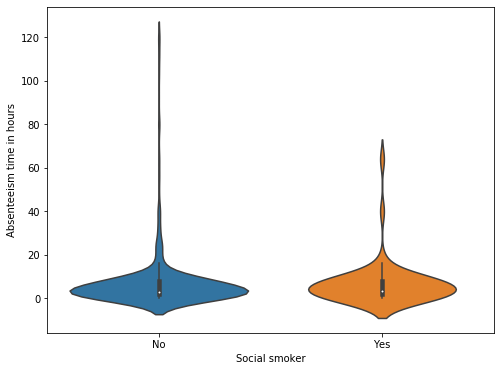

In [0]:
# create violin plots of the absenteeism time in hours
plt.figure(figsize=(8,6))
sns.violinplot(x="Social drinker", y="Absenteeism time in hours", \
                   data=preprocessed_data, order=["No", "Yes"])
plt.savefig('figs/drinkers_hour_distribution.png', format='png', dpi=300)

plt.figure(figsize=(8,6))
sns.violinplot(x="Social smoker", y="Absenteeism time in hours", \
               data=preprocessed_data, order=["No", "Yes"])
plt.savefig('figs/smokers_hour_distribution.png', format='png', dpi=300)

In [0]:
from scipy.stats import ttest_ind

hours_col = "Absenteeism time in hours"

# test mean absenteeism time for drinkers
drinkers_mask = preprocessed_data["Social drinker"] == "Yes"
hours_drinkers = preprocessed_data.loc[drinker_mask, hours_col]
hours_non_drinkers = preprocessed_data.loc[~drinker_mask, hours_col]
drinkers_test = ttest_ind(hours_drinkers, hours_non_drinkers)
print(f"Statistic value: {drinkers_test[0]}, p-value: {drinkers_test[1]}")

# test mean absenteeism time for smokers
smokers_mask = preprocessed_data["Social smoker"] == "Yes"
hours_smokers = preprocessed_data.loc[smokers_mask, hours_col]
hours_non_smokers = preprocessed_data.loc[~smokers_mask, hours_col]
smokers_test = ttest_ind(hours_smokers, hours_non_smokers)
print(f"Statistic value: {smokers_test[0]}, p-value: {smokers_test[1]}")


Statistic value: 1.7713833295243993, p-value: 0.07690961828294651
Statistic value: -0.24277795417700243, p-value: 0.8082448720154971


In [0]:
# perform Kolmogorov-Smirnov test for comparing the distributions 
from scipy.stats import ks_2samp

ks_drinkers = ks_2samp(hours_drinkers, hours_non_drinkers)
ks_smokers = ks_2samp(hours_smokers, hours_non_smokers)

print(f"Drinkers comparison: statistics={ks_drinkers[0]:.3f}, pvalue={ks_drinkers[1]:.3f}")
print(f"Smokers comparison:  statistics={ks_smokers[0]:.3f}, pvalue={ks_smokers[1]:.3f}")

Drinkers comparison: statistics=0.135, pvalue=0.002
Smokers comparison:  statistics=0.104, pvalue=0.607


### Body Mass Index

In [0]:
# define function for computing the BMI category, based on BMI value
def get_bmi_category(bmi):
    if bmi < 18.5:
        category = "underweight"
    elif bmi >= 18.5 and bmi < 25:
        category = "healthy weight"
    elif bmi >= 25 and bmi < 30:
        category = "overweight"
    elif bmi >= 30:
        category = "obese"
    return category

# compute BMI category
preprocessed_data["BMI category"] = preprocessed_data["Body mass index"]\
    .apply(get_bmi_category)

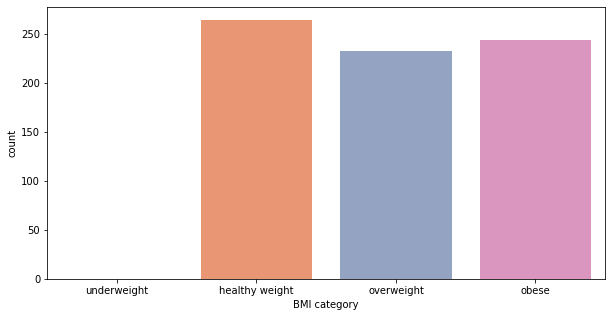

In [0]:
#### plot number of entries for each category
plt.figure(figsize=(10, 5))
sns.countplot(data=preprocessed_data, x='BMI category', 
              order=["underweight", "healthy weight", "overweight", "obese"], 
              palette="Set2")
plt.savefig('figs/bmi_categories.png', format='png', dpi=300)

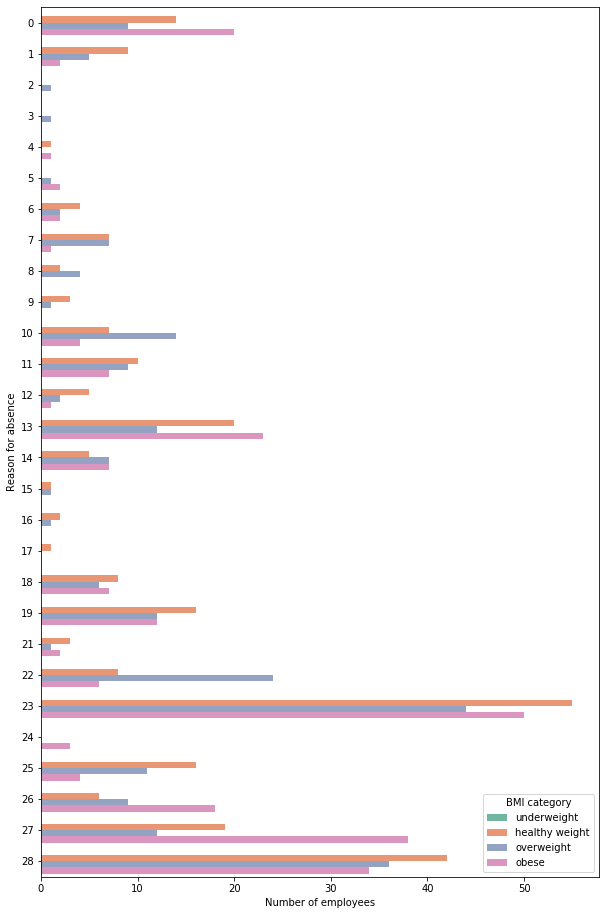

In [0]:
# plot BMI categories vs Reason for absence
plt.figure(figsize=(10, 16))
ax = sns.countplot(data=preprocessed_data, y="Reason for absence", hue="BMI category", 
              hue_order=["underweight", "healthy weight", "overweight", "obese"], 
              palette="Set2")
ax.set_xlabel("Number of employees")
plt.savefig('figs/reasons_bmi.png', format='png', dpi=300)

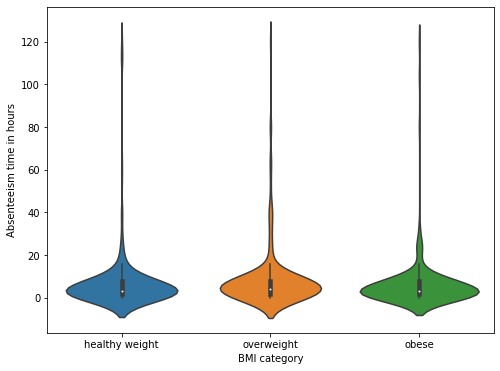

In [0]:
# plot distribution of absence time, based on BMI category
plt.figure(figsize=(8,6))
sns.violinplot(x="BMI category", y="Absenteeism time in hours", \
                   data=preprocessed_data, order=["healthy weight", "overweight", "obese"])
plt.savefig('figs/bmi_hour_distribution.png', format='png')

### Age and education factors

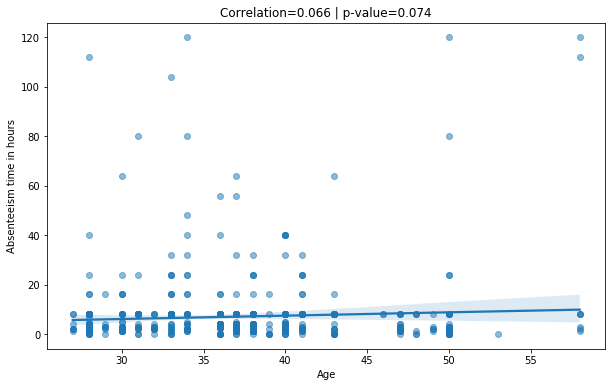

In [0]:
from scipy.stats import pearsonr

# compute Pearson's correlation coefficient and p-value
pearson_test = pearsonr(preprocessed_data["Age"], \
                        preprocessed_data["Absenteeism time in hours"])

# create regression plot and add correlation coefficient in the title
plt.figure(figsize=(10, 6))
ax = sns.regplot(x="Age", y="Absenteeism time in hours", 
            data=preprocessed_data, scatter_kws={"alpha":0.5})
ax.set_title(f"Correlation={pearson_test[0]:.03f} | p-value={pearson_test[1]:.03f}");
plt.savefig('figs/correlation_age_hours.png', format='png', dpi=300)

### Exercise 2.04: Investigate Age impact on Reason for absence

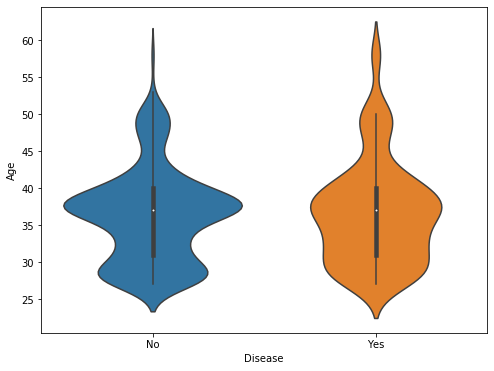

In [0]:
# create violin plot between the Age and Disease columns
plt.figure(figsize=(8,6))
sns.violinplot(x="Disease", y="Age", data=preprocessed_data)
plt.savefig('figs/exercise_204_age_disease.png', format='png', dpi=300)

In [0]:
# get Age entries for employees with Disease == Yes and Disease == No
disease_mask = preprocessed_data["Disease"] == "Yes"
disease_ages = preprocessed_data["Age"][disease_mask]
no_disease_ages = preprocessed_data["Age"][~disease_mask]

# perform hypothesis test for equality of means
test_res = ttest_ind(disease_ages, no_disease_ages)
print(f"Test for equality of means: statistic={test_res[0]:0.3f}, pvalue={test_res[1]:0.3f}")

# test equality of distributions via Kolmogorov-Smirnov test
ks_res = ks_2samp(disease_ages, no_disease_ages)
print(f"KS test for equality of distributions: statistic={ks_res[0]:0.3f}, pvalue={ks_res[1]:0.3f}")

Test for equality of means: statistic=0.630, pvalue=0.529
KS test for equality of distributions: statistic=0.057, pvalue=0.619


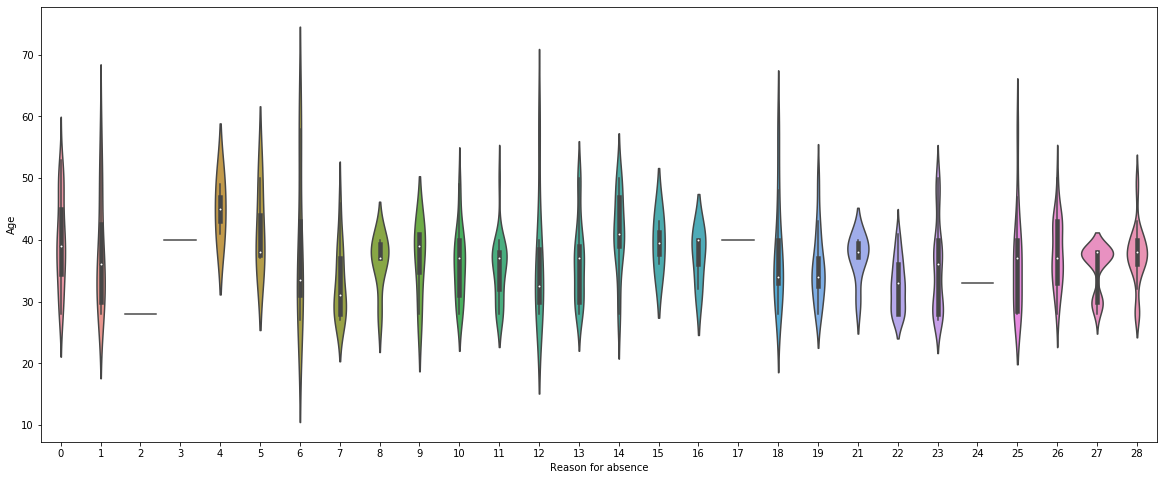

In [0]:
# violin plot of reason for absence vs age
plt.figure(figsize=(20,8))
sns.violinplot(x="Reason for absence", y="Age", data=preprocessed_data)
plt.savefig('figs/exercise_204_age_reason.png', format='png')